In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import warnings 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df= pd.read_csv('./postings.csv')

In [3]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [4]:
df.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,72500.0,92675.0,6059.0


In [5]:
s=df.shape
print('total number of rows:', s[0])
print('total number of columns:',s[1])

total number of rows: 123849
total number of columns: 31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [7]:
print('any duplicates in dataset:', df.duplicated().sum().any())

any duplicates in dataset: False


In [8]:
print('Total no of null values in dataset:', df.isnull().sum().sum())

Total no of null values in dataset: 1269564


In [9]:


# Check for null values in each column
null_columns = df.isnull().sum()

# Display columns with null values
print(null_columns[null_columns > 0])


company_name                    1719
description                        7
max_salary                     94056
pay_period                     87776
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
applies                       100529
remote_allowed                108603
application_url                36665
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
posting_domain                 39968
currency                       87776
compensation_type              87776
normalized_salary              87776
zip_code                       20872
fips                           27415
dtype: int64


## Data Cleaning

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

 

# Segregate the columns into categories (keeping only relevant text data for LDA)
text_columns = ['title', 'description', 'skills_desc', 'location', 
                'formatted_work_type', 'formatted_experience_level', 'posting_domain', 
                'work_type', 'compensation_type', 'currency']

numeric_columns = ['job_id', 'max_salary', 'views', 'med_salary', 'min_salary', 
                   'applies', 'original_listed_time', 'expiry', 'closed_time', 
                   'listed_time', 'sponsored', 'normalized_salary', 'zip_code', 'fips']

categorical_columns = ['company_name', 'company_id', 'remote_allowed']

# *1. Handle Missing Data*
# Drop Columns with Too Many Missing Values (If needed)
columns_to_drop = ['remote_allowed', 'closed_time', 'applies', 'job_posting_url', 'application_url', 'company_id']

# Check if columns exist before dropping
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Fill Missing Categorical Values with the Mode (Most Frequent Value)
categorical_cols = ['company_name', 'pay_period', 'formatted_experience_level',
                    'posting_domain', 'work_type', 'compensation_type', 'currency']
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)

# Fill Missing Numerical Values with Median (or -1 as Placeholder)
numerical_cols = ['views', 'max_salary', 'min_salary', 'med_salary', 'normalized_salary', 'zip_code', 'fips']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# *2. Drop Rows Where 'description' or 'skills_desc' is Missing*
df.dropna(subset=['description', 'skills_desc'], inplace=True)

# *3. Convert Data Types Safely*
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')
df['fips'] = pd.to_numeric(df['fips'], errors='coerce')

# *4. Text Preprocessing*

# Text preprocessing function
def preprocess_text(text):
    if pd.isna(text):  # Handle missing values (though we already filled nulls)
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to all text columns and store in cleaned columns
for column in text_columns:
    df[f'cleaned_{column}'] = df[column].apply(preprocess_text)

# *5. Final Cleanup: Drop Columns That Are Not Necessary for Topic Modeling (LDA)*
# Drop columns that are not essential for LDA analysis
columns_to_drop = ['job_posting_url', 'application_url', 'company_id', 'original_listed_time', 'expiry', 'listed_time', 'sponsored']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# *6. Final Check*
# Check for remaining null values
print(df.isnull().sum())

# Check the cleaned data
df.head()


[nltk_data] Downloading package punkt to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


job_id                                0
company_name                          0
title                                 0
description                           0
max_salary                            0
pay_period                            0
location                              0
views                                 0
med_salary                            0
min_salary                            0
formatted_work_type                   0
application_type                      0
formatted_experience_level            0
skills_desc                           0
posting_domain                        0
work_type                             0
currency                              0
compensation_type                     0
normalized_salary                     0
zip_code                              0
fips                                  0
cleaned_title                         0
cleaned_description                   0
cleaned_skills_desc                   0
cleaned_location                      0


,job_id,company_name,title,description,max_salary,pay_period,location,views,med_salary,min_salary,...,cleaned_title,cleaned_description,cleaned_skills_desc,cleaned_location,cleaned_formatted_work_type,cleaned_formatted_experience_level,cleaned_posting_domain,cleaned_work_type,cleaned_compensation_type,cleaned_currency
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",20.0,25.5,17.0,...,marketing coordinator,job descriptiona leading real estate firm new ...,requirement seeking college graduate student a...,princeton nj,fulltime,midsenior level,wwwclickapplynet,fulltime,basesalary,usd
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",8.0,25.5,45000.0,...,assitant restaurant manager,national exemplar accepting application assist...,currently accepting resume foh asisstant resta...,cincinnati oh,fulltime,midsenior level,wwwclickapplynet,fulltime,basesalary,usd
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",16.0,25.5,140000.0,...,senior elder law trust estate associate attorney,senior associate attorney elder law trust esta...,position requires baseline understanding onlin...,new hyde park ny,fulltime,midsenior level,wwwclickapplynet,fulltime,basesalary,usd
8,1218575,Children's Nebraska,Respiratory Therapist,"At Children’s, the region’s only full-service ...",80000.0,YEARLY,"Omaha, NE",3.0,25.5,60000.0,...,respiratory therapist,childrens region fullservice pediatric healthc...,requires ability communicate effective verball...,omaha ne,fulltime,midsenior level,wwwclickapplynet,fulltime,basesalary,usd
9,2264355,Bay West Church,Worship Leader,It is an exciting time to be a part of our chu...,80000.0,MONTHLY,"Palm Bay, FL",5.0,350.0,60000.0,...,worship leader,exciting time part church looking right energe...,knowledge skill ability proficient computer te...,palm bay fl,parttime,midsenior level,wwwclickapplynet,parttime,basesalary,usd


## Combining the text to fit in the model

In [11]:
# Combine relevant text columns into one column for topic modeling
df['combined_text'] = df['title'] + ' ' + df['description'] + ' ' + df['skills_desc']

# Check the first few rows to ensure the combined text looks correct
df[['title', 'description', 'skills_desc', 'combined_text']].head()


,title,description,skills_desc,combined_text
0,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Requirements: \n\nWe are seeking a College or ...,Marketing Coordinator Job descriptionA leading...
2,Assitant Restaurant Manager,The National Exemplar is accepting application...,We are currently accepting resumes for FOH - A...,Assitant Restaurant Manager The National Exemp...
3,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,This position requires a baseline understandin...,Senior Elder Law / Trusts and Estates Associat...
8,Respiratory Therapist,"At Children’s, the region’s only full-service ...",• Requires the ability to communicate effectiv...,"Respiratory Therapist At Children’s, the regio..."
9,Worship Leader,It is an exciting time to be a part of our chu...,"Knowledge, Skills and Abilities: 1. Proficient...",Worship Leader It is an exciting time to be a ...


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the combined_text column
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Check the cleaned text
df[['combined_text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,combined_text,cleaned_text
0,Marketing Coordinator Job descriptionA leading...,marketing coordinator job descriptiona leading...
2,Assitant Restaurant Manager The National Exemp...,assitant restaurant manager national exemplar ...
3,Senior Elder Law / Trusts and Estates Associat...,senior elder law trust estate associate attorn...
8,"Respiratory Therapist At Children’s, the regio...",respiratory therapist childrens region fullser...
9,Worship Leader It is an exciting time to be a ...,worship leader exciting time part church looki...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the 'combined_text' column
X = vectorizer.fit_transform(df['cleaned_text'])

# Check the shape of the resulting matrix (this will show how many documents and features we have)
print(X.shape)


(2439, 1000)


## Fitting the LDA model

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # We are specifying 5 topics for now
lda.fit(X)

# Display the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Get the top words for each topic (You can adjust n_top_words as needed)
n_top_words = 10
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Topic #0:
careerstaff data experience rn nurse registered developer healthcare unlimited cloud
Topic #1:
food surveillance kitchen frasco investigation nursing restaurant patient insurance assignment
Topic #2:
volunteer patient care community family disaster hospice health provided help
Topic #3:
guest tax engineering design power sale firm engineer project golf
Topic #4:
work customer service experience team employee company ability sale required


## Train the LDA model

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the combined_text column
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)

# Check the cleaned text
df[['combined_text', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SREE
[nltk_data]     GANESHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,combined_text,cleaned_text
0,Marketing Coordinator Job descriptionA leading...,marketing coordinator job descriptiona leading...
2,Assitant Restaurant Manager The National Exemp...,assitant restaurant manager national exemplar ...
3,Senior Elder Law / Trusts and Estates Associat...,senior elder law trust estate associate attorn...
8,"Respiratory Therapist At Children’s, the regio...",respiratory therapist childrens region fullser...
9,Worship Leader It is an exciting time to be a ...,worship leader exciting time part church looki...


In [16]:
from gensim import corpora
from gensim.models import LdaModel


# Create a dictionary and corpus from the cleaned text data
texts = df['cleaned_text'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model (e.g., 5 topics)
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)



## Data Visualisation

Please enter your query:  analyst


C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_2900\1178034372.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ensure labels do not overlap


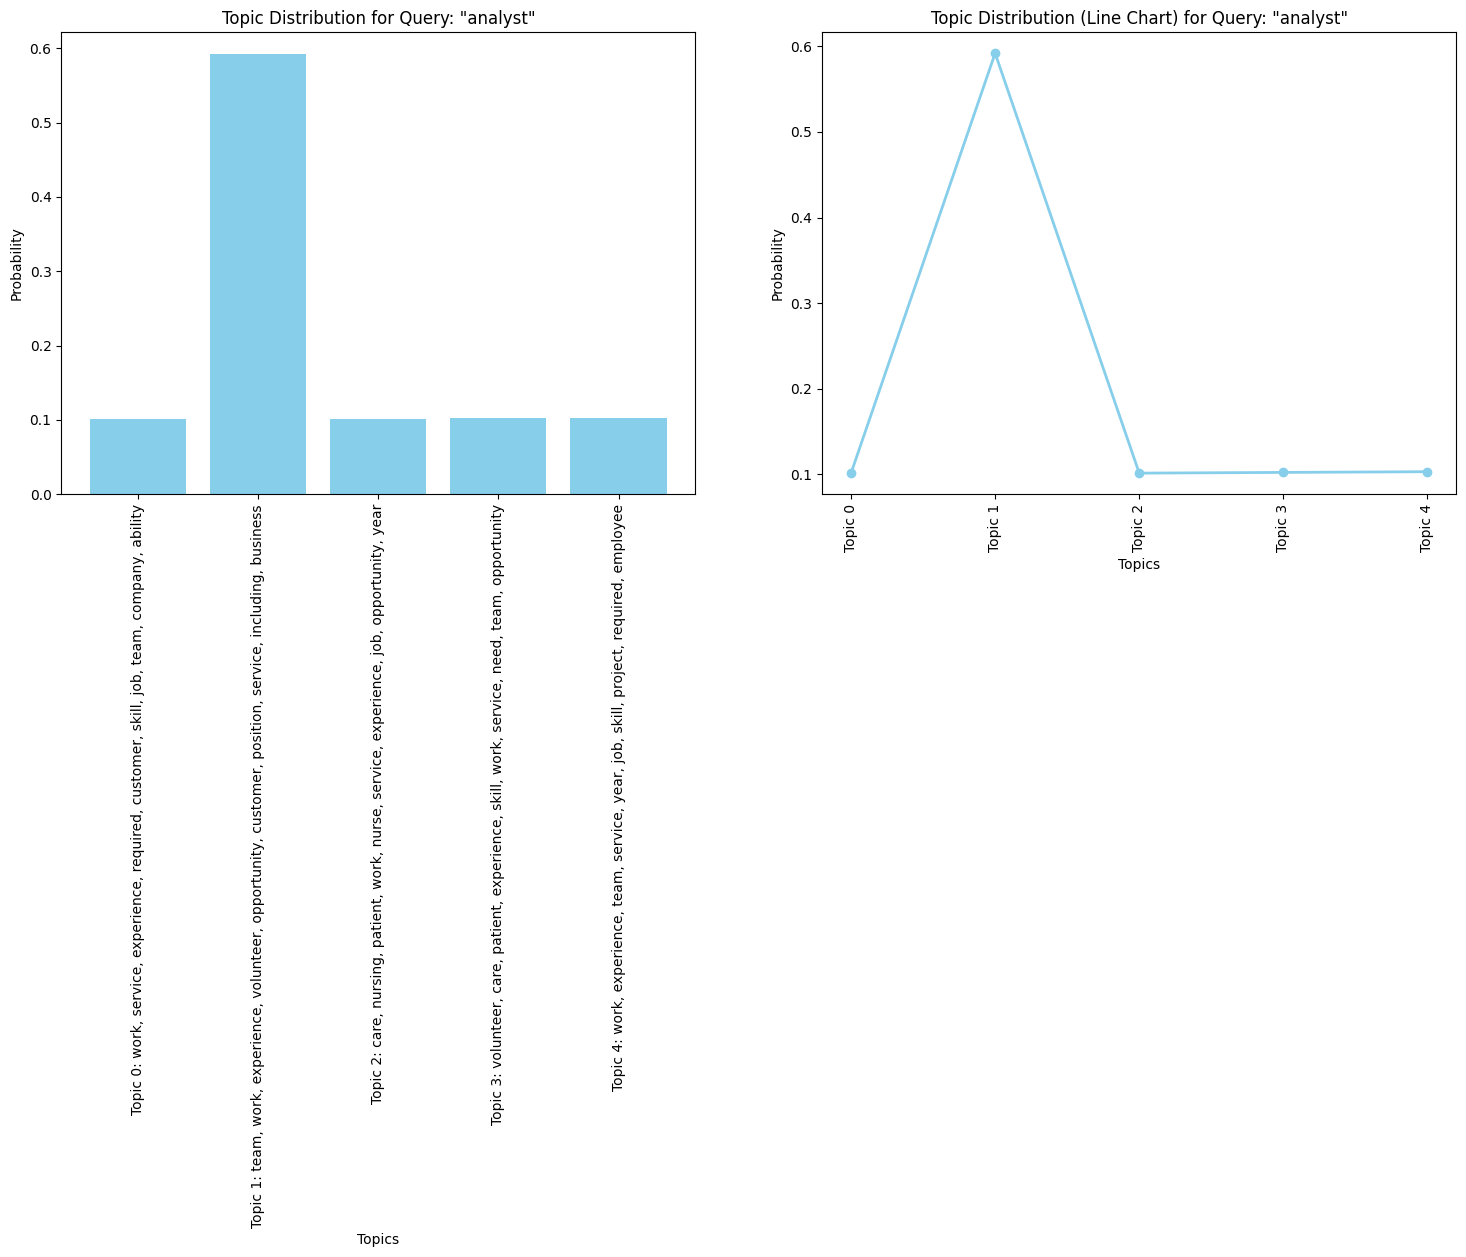

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming preprocess_text, lda_model, and dictionary are already defined
def query_to_lda(query, lda_model, dictionary):
    query_processed = preprocess_text(query)  # Preprocess the query
    query_bow = dictionary.doc2bow(query_processed.split())  # Convert to bag-of-words format
    query_lda = lda_model[query_bow]  # Get the topic distribution for the query
    return query_lda

# Function to get top keywords for each topic
def get_top_keywords_for_topic(lda_model, dictionary, num_words=10):
    keywords = {}
    for idx, topic in lda_model.show_topics(formatted=False, num_topics=lda_model.num_topics):
        top_keywords = [word for word, _ in topic[:num_words]]  # Get the top words for each topic
        keywords[f"Topic {idx}"] = top_keywords
    return keywords

# Function to plot both topic distribution (Bar and Line Chart)
def plot_topic_distribution(lda_model, query, dictionary, num_keywords=10):
    # Get the topic distribution for the query using the query_to_lda function
    topic_distribution = query_to_lda(query, lda_model, dictionary)
    
    # Get the top keywords for each topic
    topic_keywords = get_top_keywords_for_topic(lda_model, dictionary, num_keywords)
    
    # Plot topic distribution as a bar graph
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    
    # Bar chart for topic distribution
    topic_probs = [prob for _, prob in topic_distribution]
    ax[0].bar(np.arange(len(topic_probs)), topic_probs, color='skyblue')
    ax[0].set_xticks(np.arange(len(topic_probs)))
    ax[0].set_xticklabels([f"Topic {i}: {', '.join(topic_keywords[f'Topic {i}'])}" for i in range(len(topic_probs))], rotation=90)
    ax[0].set_xlabel('Topics')
    ax[0].set_ylabel('Probability')
    ax[0].set_title(f'Topic Distribution for Query: "{query}"')
    
    # Line chart for topic distribution
    ax[1].plot(np.arange(len(topic_probs)), topic_probs, marker='o', color='skyblue', linestyle='-', linewidth=2)
    ax[1].set_xticks(np.arange(len(topic_probs)))
    ax[1].set_xticklabels([f"Topic {i}" for i in range(len(topic_probs))], rotation=90)
    ax[1].set_xlabel('Topics')
    ax[1].set_ylabel('Probability')
    ax[1].set_title(f'Topic Distribution (Line Chart) for Query: "{query}"')
    
    plt.tight_layout()  # Ensure labels do not overlap
    plt.show()

# Get user input for the query
query = input("Please enter your query: ")

# Call the function to plot the topic distribution
plot_topic_distribution(lda_model, query, dictionary)

Enter the job role to analyze trends:  analyst


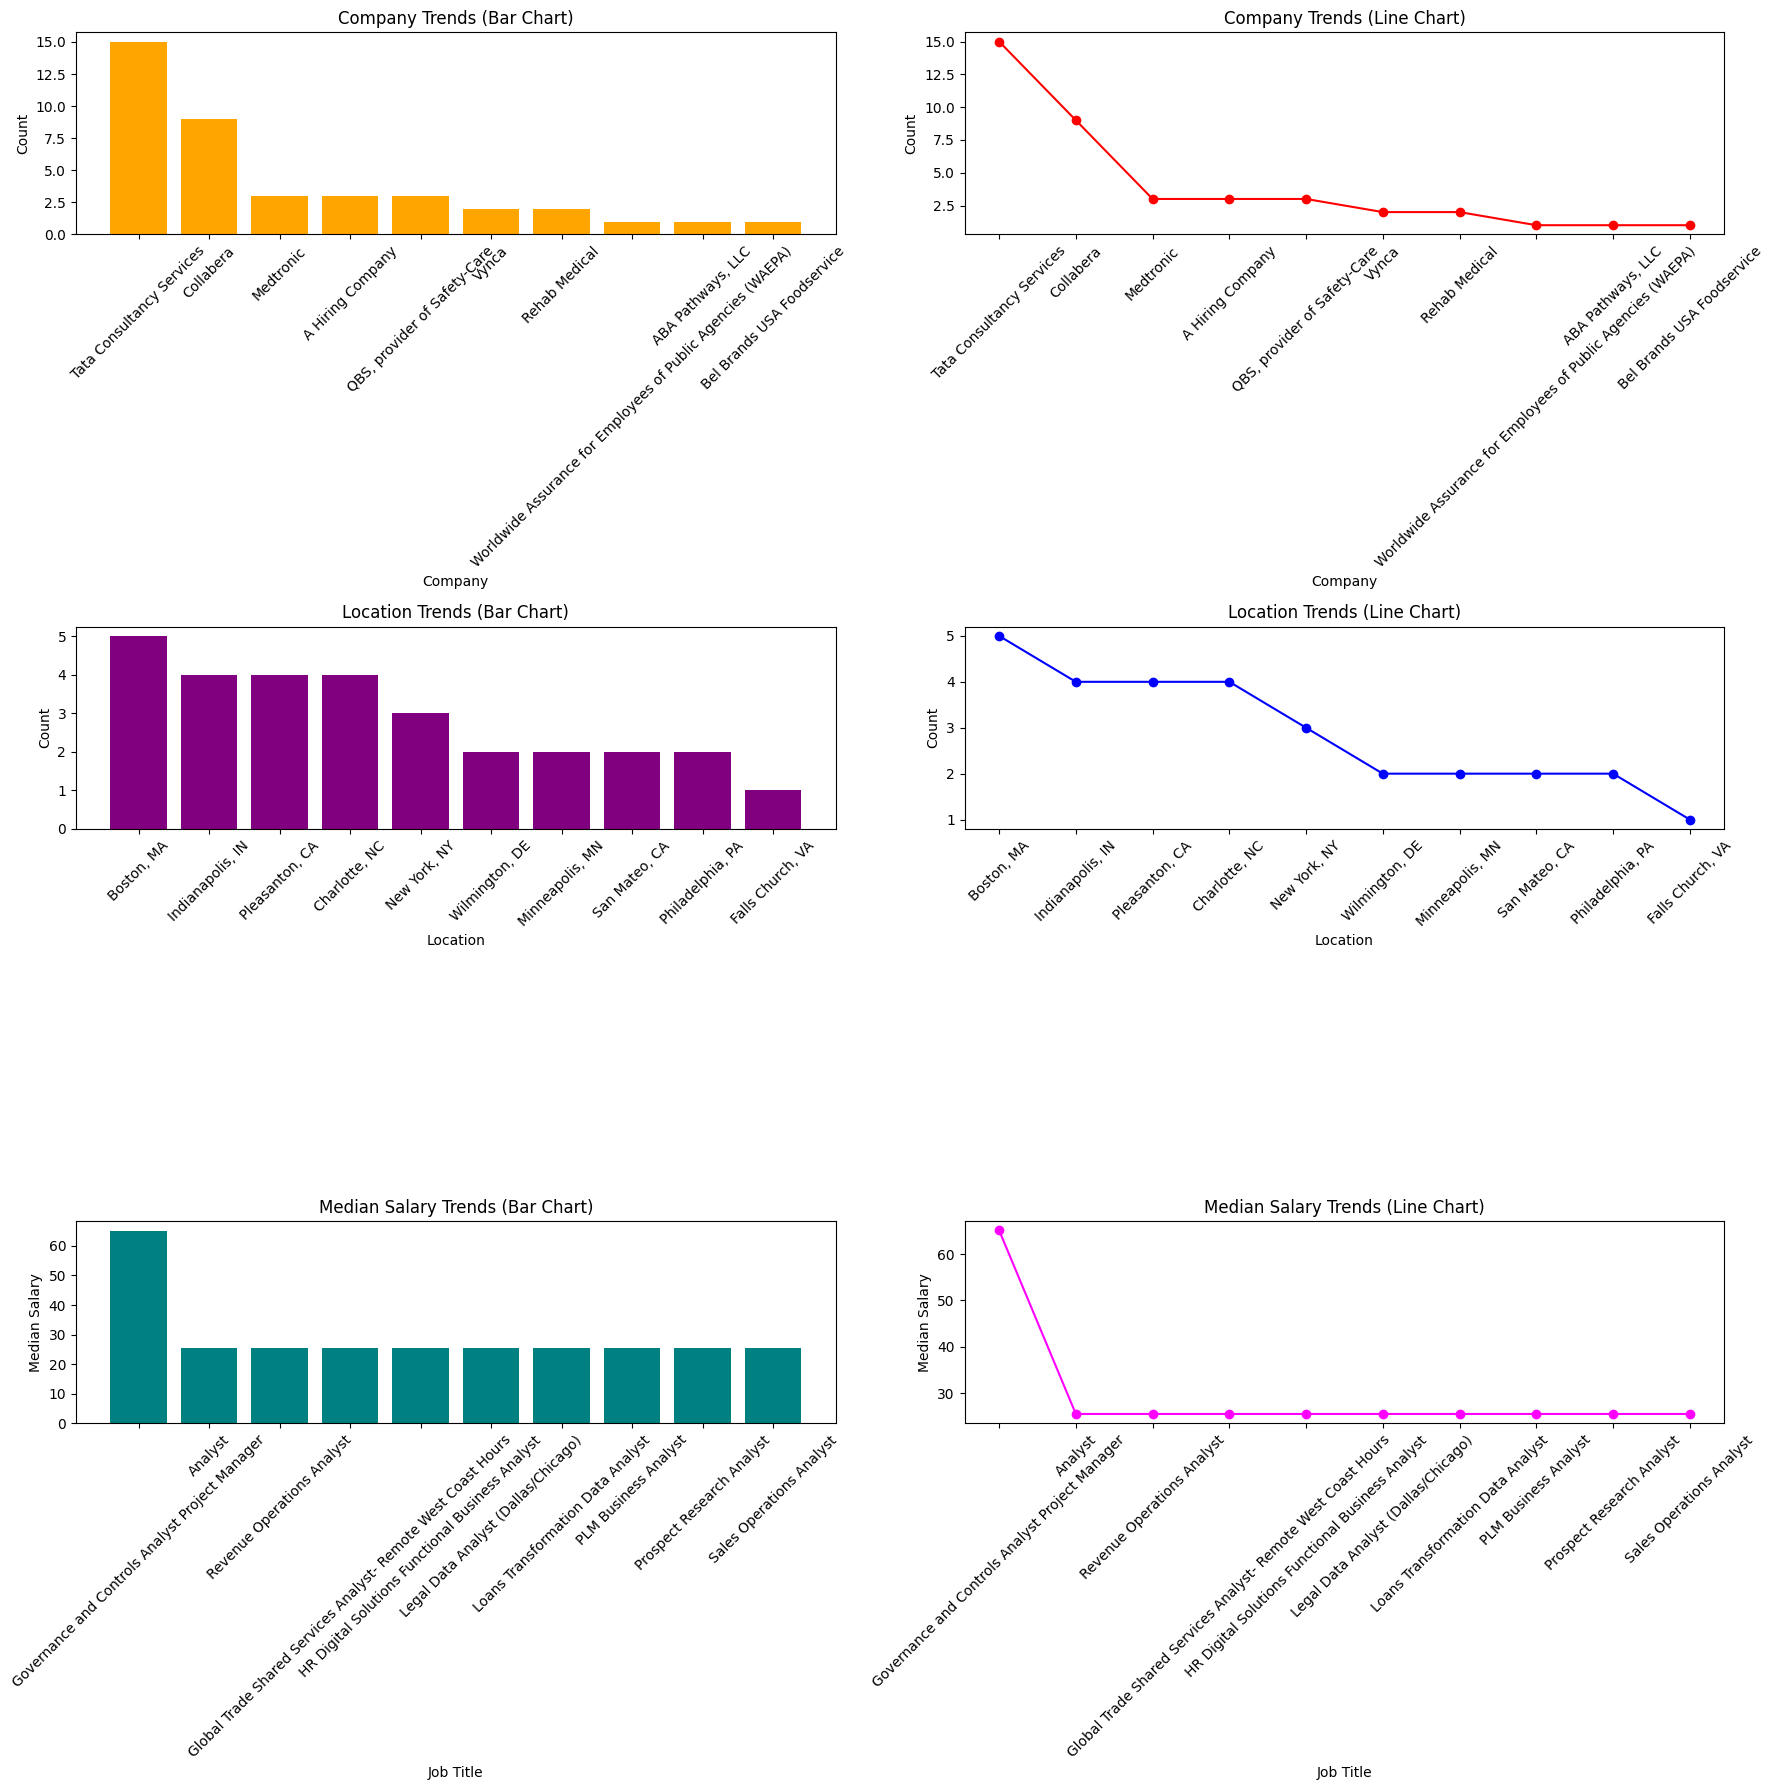

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with relevant columns
def plot_trends(df, job_role):
    # Filter data based on the selected job role
    filtered_df = df[df['title'].str.contains(job_role, case=False, na=False)]

    # Check if data exists for the job role
    if filtered_df.empty:
        print(f"No data found for job role: {job_role}")
        return

    # Grouping and counting for company and location trends
    company_counts = filtered_df['company_name'].value_counts()
    location_counts = filtered_df['location'].value_counts()

    # Handling salary trends (using max, median, and min salaries)
    salary_trends = filtered_df.groupby('title')[['max_salary', 'med_salary', 'min_salary']].mean().sort_values(by='med_salary', ascending=False)

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))  # 3 trends with bar and line charts side by side

    # Company Trends
    axs[0, 0].bar(company_counts.index[:10], company_counts.values[:10], color='orange')  # Top 10 companies
    axs[0, 0].set_title('Company Trends (Bar Chart)')
    axs[0, 0].set_xlabel('Company')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].tick_params(axis='x', rotation=45)

    axs[0, 1].plot(company_counts.index[:10], company_counts.values[:10], marker='o', linestyle='-', color='red')
    axs[0, 1].set_title('Company Trends (Line Chart)')
    axs[0, 1].set_xlabel('Company')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].tick_params(axis='x', rotation=45)

    # Location Trends
    axs[1, 0].bar(location_counts.index[:10], location_counts.values[:10], color='purple')  # Top 10 locations
    axs[1, 0].set_title('Location Trends (Bar Chart)')
    axs[1, 0].set_xlabel('Location')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].tick_params(axis='x', rotation=45)

    axs[1, 1].plot(location_counts.index[:10], location_counts.values[:10], marker='o', linestyle='-', color='blue')
    axs[1, 1].set_title('Location Trends (Line Chart)')
    axs[1, 1].set_xlabel('Location')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].tick_params(axis='x', rotation=45)

    # Salary Trends
    axs[2, 0].bar(salary_trends.index[:10], salary_trends['med_salary'].values[:10], color='teal')  # Top 10 job titles
    axs[2, 0].set_title('Median Salary Trends (Bar Chart)')
    axs[2, 0].set_xlabel('Job Title')
    axs[2, 0].set_ylabel('Median Salary')
    axs[2, 0].tick_params(axis='x', rotation=45)

    axs[2, 1].plot(salary_trends.index[:10], salary_trends['med_salary'].values[:10], marker='o', linestyle='-', color='magenta')
    axs[2, 1].set_title('Median Salary Trends (Line Chart)')
    axs[2, 1].set_xlabel('Job Title')
    axs[2, 1].set_ylabel('Median Salary')
    axs[2, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Get user input for the job role
job_role = input("Enter the job role to analyze trends: ")

# Call the function to plot trends
plot_trends(df, job_role)


Enter the job role to analyze trends:  clerk


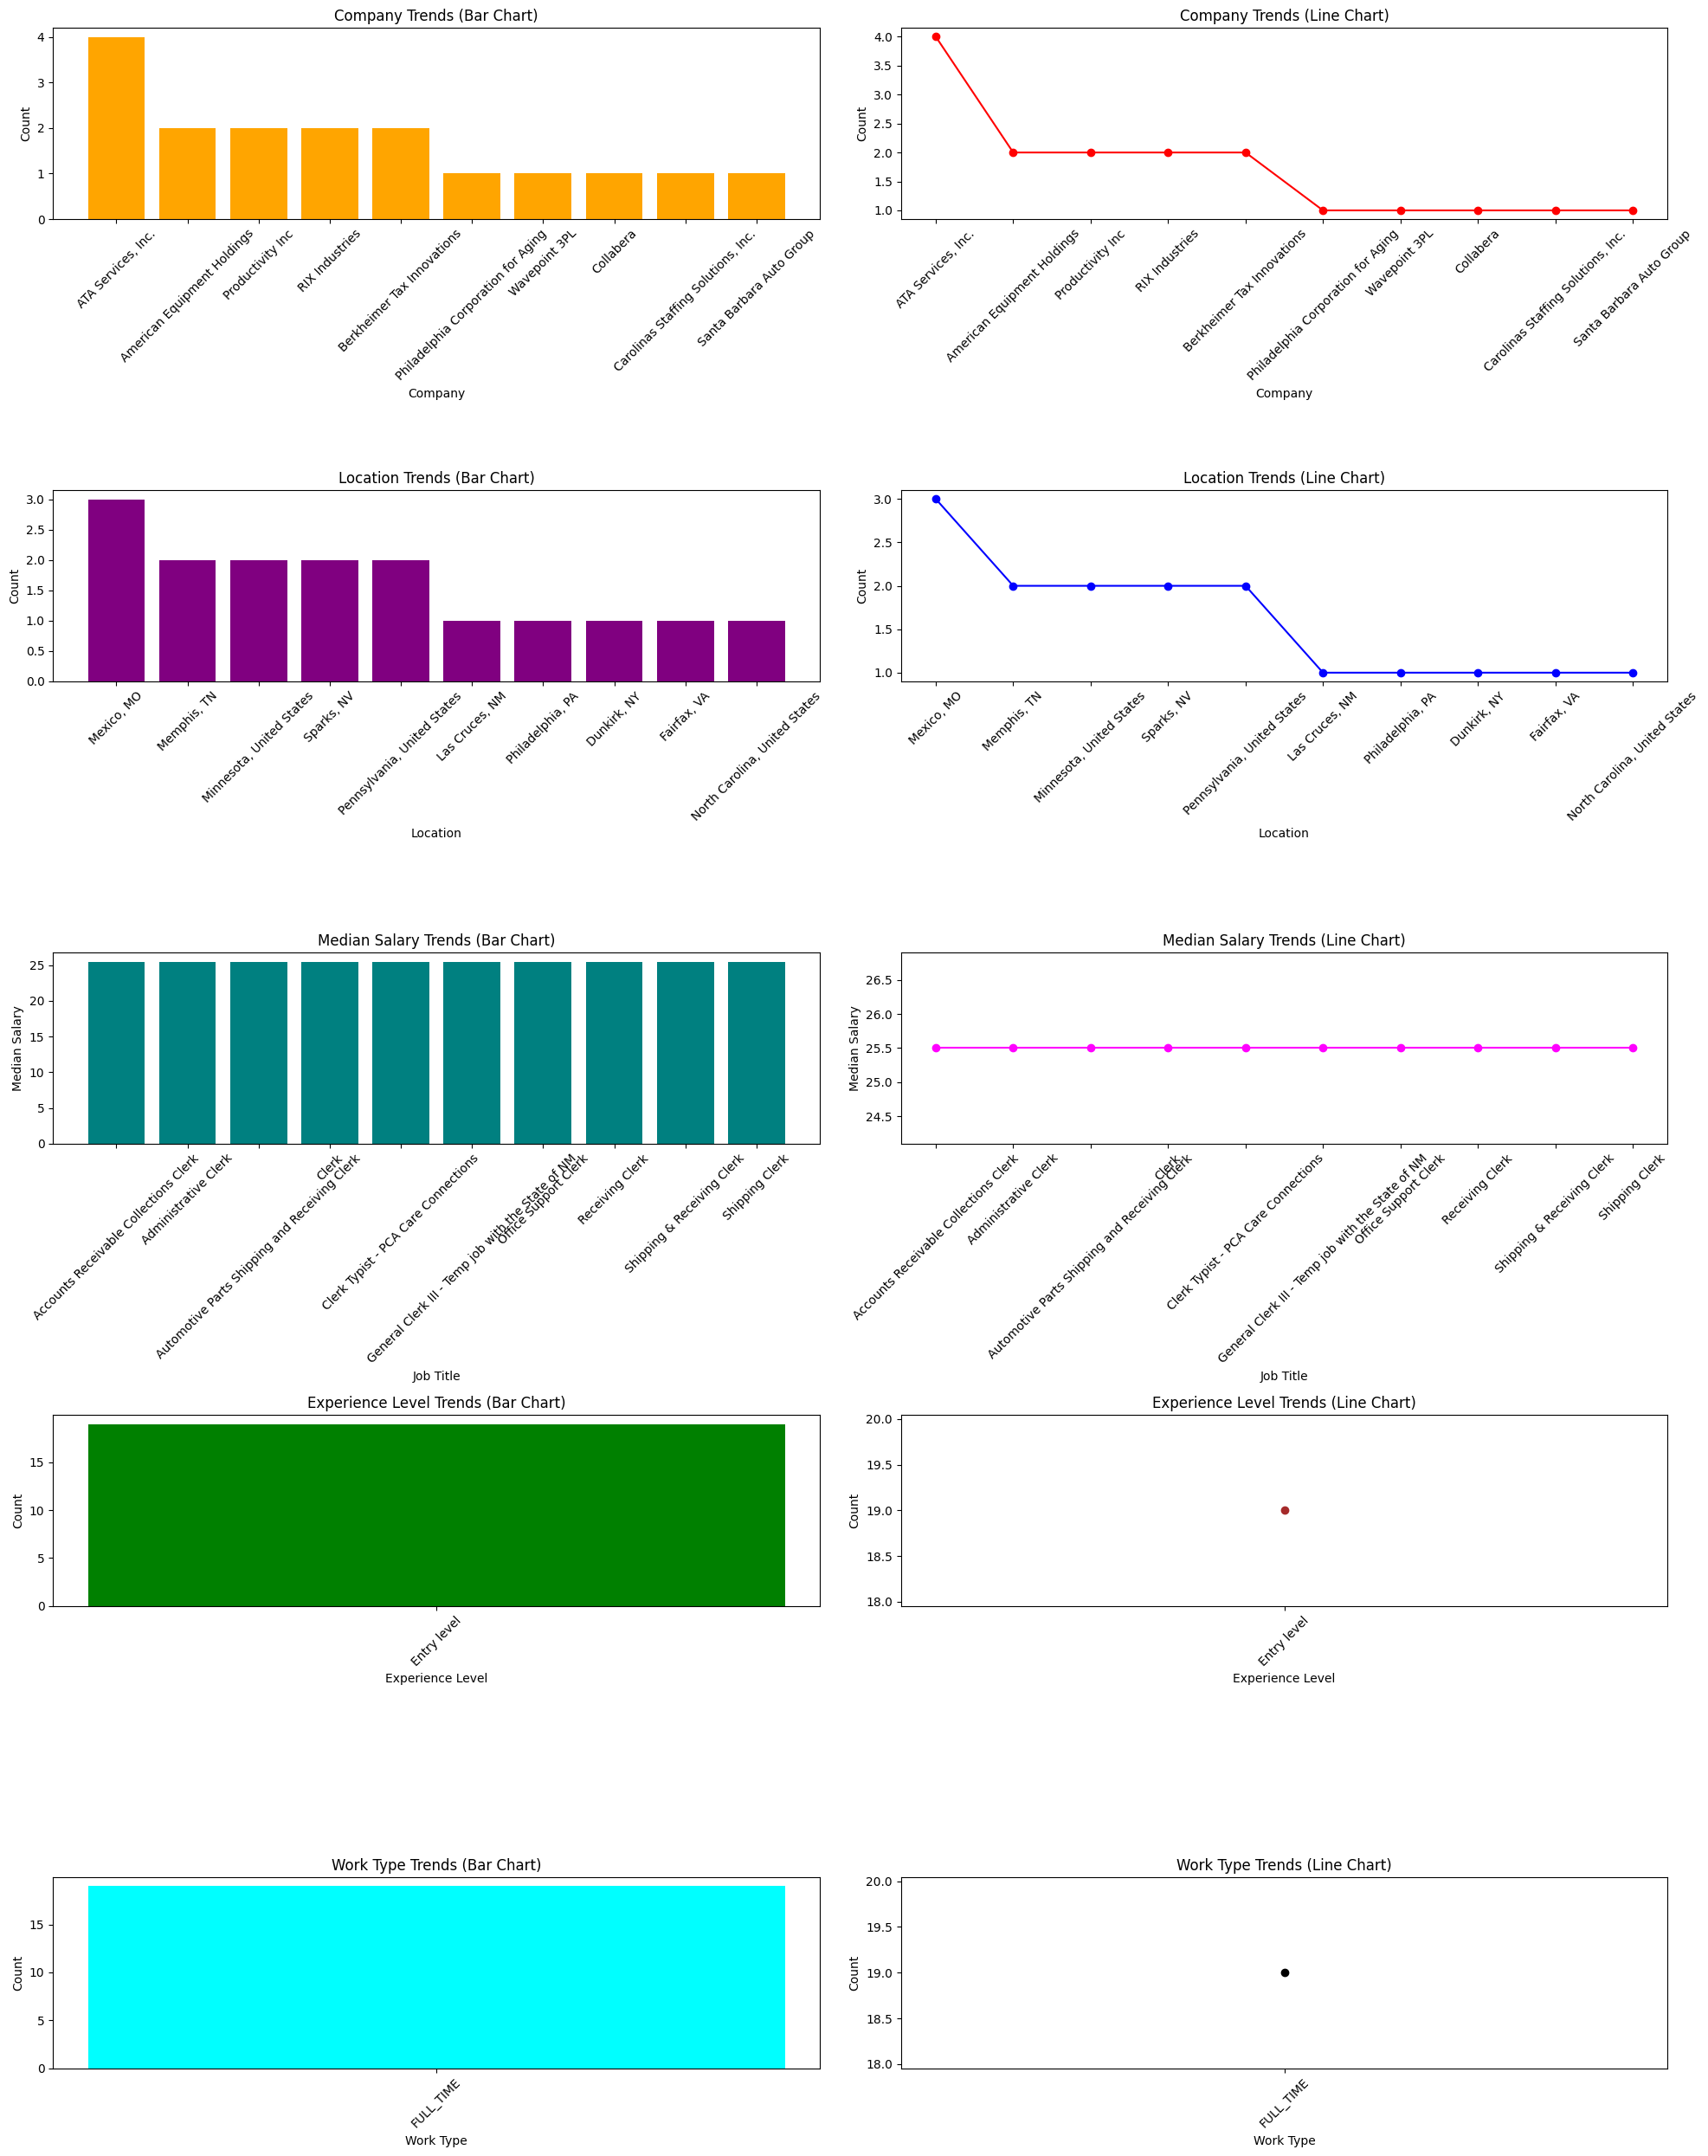

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_trends(df, job_role):
    # Filter data based on the selected job role
    filtered_df = df[df['title'].str.contains(job_role, case=False, na=False)]

    # Check if data exists for the job role
    if filtered_df.empty:
        print(f"No data found for job role: {job_role}")
        return

    # Grouping and counting for company, location, experience level, work type, and compensation type trends
    company_counts = filtered_df['company_name'].value_counts()
    location_counts = filtered_df['location'].value_counts()
    experience_counts = filtered_df['formatted_experience_level'].value_counts()
    work_type_counts = filtered_df['work_type'].value_counts()
    compensation_counts = filtered_df['compensation_type'].value_counts()

    # Handling salary trends (using max, median, and min salaries)
    salary_trends = filtered_df.groupby('title')[['max_salary', 'med_salary', 'min_salary']].mean().sort_values(by='med_salary', ascending=False)

    # Plotting
    fig, axs = plt.subplots(5, 2, figsize=(20, 25))  # 5 trends with bar and line charts side by side

    # Function to create bar and line charts
    def plot_bar_line(ax_bar, ax_line, data, title, xlabel, ylabel, color_bar, color_line):
        ax_bar.bar(data.index[:10], data.values[:10], color=color_bar)  # Top 10
        ax_bar.set_title(f'{title} (Bar Chart)')
        ax_bar.set_xlabel(xlabel)
        ax_bar.set_ylabel(ylabel)
        ax_bar.tick_params(axis='x', rotation=45)

        ax_line.plot(data.index[:10], data.values[:10], marker='o', linestyle='-', color=color_line)
        ax_line.set_title(f'{title} (Line Chart)')
        ax_line.set_xlabel(xlabel)
        ax_line.set_ylabel(ylabel)
        ax_line.tick_params(axis='x', rotation=45)

    # Plotting each trend
    plot_bar_line(axs[0, 0], axs[0, 1], company_counts, 'Company Trends', 'Company', 'Count', 'orange', 'red')
    plot_bar_line(axs[1, 0], axs[1, 1], location_counts, 'Location Trends', 'Location', 'Count', 'purple', 'blue')
    plot_bar_line(axs[2, 0], axs[2, 1], salary_trends['med_salary'], 'Median Salary Trends', 'Job Title', 'Median Salary', 'teal', 'magenta')
    plot_bar_line(axs[3, 0], axs[3, 1], experience_counts, 'Experience Level Trends', 'Experience Level', 'Count', 'green', 'brown')
    plot_bar_line(axs[4, 0], axs[4, 1], work_type_counts, 'Work Type Trends', 'Work Type', 'Count', 'cyan', 'black')
    
    plt.tight_layout()
    plt.show()

# Get user input for the job role
job_role = input("Enter the job role to analyze trends: ")

# Call the function to plot trends
plot_trends(df, job_role)
